### Download ERA5 climate data using CDS API

In [2]:
import os
import cdsapi
import calendar

client = cdsapi.Client()

dataset = "derived-era5-single-levels-daily-statistics"

# Years and months to download
years = range(1980, 2023)    # 1980–2022 inclusive
months = range(1, 13)

# Fixed parameters that don't change each request
base_request = {
    "product_type": "reanalysis",
    "variable": ["total_precipitation"],
    "daily_statistic": "daily_sum",
    "time_zone": "utc-07:00",
    "frequency": "1_hourly",
    "area": [62, -129, 47, -105]   # N, W, S, E
}

output_dir = "ERA5_data\ERA5_precip"
os.makedirs(output_dir, exist_ok=True)

for year in years:
    for month in months:
        # Output file name: era5_precip_YYYY_MM.nc
        out_file = os.path.join(output_dir, f"era5_precip_{year}_{month:02d}.nc")

        # Skip if file already exists
        if os.path.exists(out_file):
            print(f"✔ Skipping {year}-{month:02d} (already downloaded)")
            continue

        print(f"⏳ Downloading {year}-{month:02d} ...")

        # Determine the correct number of days in that month
        days_in_month = calendar.monthrange(year, month)[1]
        day_list = [f"{d:02d}" for d in range(1, days_in_month + 1)]

        request = {
            **base_request,
            "year": str(year),
            "month": f"{month:02d}",
            "day": day_list
        }

        try:
            client.retrieve(dataset, request, out_file)
            print(f"✅ Done {year}-{month:02d}")

        except Exception as e:
            print(f"❌ Failed {year}-{month:02d}: {e}")
            print("Will retry next time you run the script.")

✔ Skipping 1980-01 (already downloaded)
✔ Skipping 1980-02 (already downloaded)
✔ Skipping 1980-03 (already downloaded)
✔ Skipping 1980-04 (already downloaded)
✔ Skipping 1980-05 (already downloaded)
✔ Skipping 1980-06 (already downloaded)
✔ Skipping 1980-07 (already downloaded)
✔ Skipping 1980-08 (already downloaded)
✔ Skipping 1980-09 (already downloaded)
✔ Skipping 1980-10 (already downloaded)
✔ Skipping 1980-11 (already downloaded)
✔ Skipping 1980-12 (already downloaded)
✔ Skipping 1981-01 (already downloaded)
✔ Skipping 1981-02 (already downloaded)
✔ Skipping 1981-03 (already downloaded)
✔ Skipping 1981-04 (already downloaded)
✔ Skipping 1981-05 (already downloaded)
✔ Skipping 1981-06 (already downloaded)
✔ Skipping 1981-07 (already downloaded)
✔ Skipping 1981-08 (already downloaded)
✔ Skipping 1981-09 (already downloaded)
✔ Skipping 1981-10 (already downloaded)
✔ Skipping 1981-11 (already downloaded)
✔ Skipping 1981-12 (already downloaded)
✔ Skipping 1982-01 (already downloaded)


In [ ]:
import os
import cdsapi
import calendar

client = cdsapi.Client()

# -----------------------------
# CONFIGURATION
# -----------------------------
years = range(1980, 2023)   # 1980–2022 inclusive

# Output directory
temp_dir = "ERA5_data/ERA5_temp"
os.makedirs(temp_dir, exist_ok=True)

# Fixed parameters for temperature
temp_base = {
    "product_type": ["reanalysis"],
    "variable": ["2m_temperature"],
    "time": [f"{h:02d}:00" for h in range(24)],  # 00:00–23:00
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [62, -129, 47, -105]
}

# -----------------------------
# DOWNLOAD LOOP (YEARLY BATCHES)
# -----------------------------
for year in years:
    temp_file = os.path.join(temp_dir, f"era5_temp_{year}.nc")

    if os.path.exists(temp_file):
        print(f"✔ Skipping temp {year} (already downloaded)")
        continue

    print(f"⏳ Downloading temp {year} ...")

    # Build request for all months and days in the year
    months = [f"{m:02d}" for m in range(1, 13)]
    days = [f"{d:02d}" for d in range(1, 32)]  # CDS handles invalid days automatically

    temp_request = {
        **temp_base,
        "year": str(year),
        "month": months,
        "day": days
    }

    try:
        client.retrieve("reanalysis-era5-single-levels", temp_request, temp_file)
        print(f"✅ Done temp {year}")
    except Exception as e:
        print(f"❌ Failed temp {year}: {e}")

✔ Skipping temp 1980 (already downloaded)
✔ Skipping temp 1981 (already downloaded)
✔ Skipping temp 1982 (already downloaded)
✔ Skipping temp 1983 (already downloaded)
✔ Skipping temp 1984 (already downloaded)
✔ Skipping temp 1985 (already downloaded)
✔ Skipping temp 1986 (already downloaded)
✔ Skipping temp 1987 (already downloaded)
✔ Skipping temp 1988 (already downloaded)
✔ Skipping temp 1989 (already downloaded)
✔ Skipping temp 1990 (already downloaded)
✔ Skipping temp 1991 (already downloaded)
✔ Skipping temp 1992 (already downloaded)
✔ Skipping temp 1993 (already downloaded)
✔ Skipping temp 1994 (already downloaded)
✔ Skipping temp 1995 (already downloaded)
✔ Skipping temp 1996 (already downloaded)
✔ Skipping temp 1997 (already downloaded)
✔ Skipping temp 1998 (already downloaded)
✔ Skipping temp 1999 (already downloaded)
✔ Skipping temp 2000 (already downloaded)
✔ Skipping temp 2001 (already downloaded)
⏳ Downloading temp 2002 ...


2025-11-26 11:32:26,754 INFO Request ID is b673265a-117f-4bda-adf1-6c356b93e1ce
2025-11-26 11:32:26,949 INFO status has been updated to accepted
2025-11-26 12:35:16,312 INFO status has been updated to successful


3678e7371f2b4595c0c4bc4d10950a81.grib:   0%|          | 0.00/99.8M [00:00<?, ?B/s]

✅ Done temp 2002
⏳ Downloading temp 2003 ...


2025-11-26 12:37:04,087 INFO Request ID is d8109e08-f8f3-4e91-b5f7-22a7c4efb53a
2025-11-26 12:37:04,288 INFO status has been updated to accepted
2025-11-26 13:05:34,763 INFO status has been updated to running
2025-11-26 13:11:37,280 INFO status has been updated to accepted
2025-11-26 13:13:38,033 INFO status has been updated to running
2025-11-26 13:25:42,329 INFO status has been updated to successful


eca09c2d9687b068856c230cda496af4.grib:   0%|          | 0.00/99.8M [00:00<?, ?B/s]

✅ Done temp 2003
⏳ Downloading temp 2004 ...


2025-11-26 13:26:07,292 INFO Request ID is 81bb1451-129d-4ad2-b5c9-ba5281c6e488
2025-11-26 13:26:07,518 INFO status has been updated to accepted


### Data visualization

In [ ]:
from netCDF4 import Dataset

nc = Dataset("era5_test_data.nc", "r")
print(nc.variables.keys())  # list variables

dict_keys(['t2m', 'number', 'latitude', 'longitude', 'valid_time'])


In [ ]:
arr = nc.variables['t2m'][:]
lats = nc.variables['latitude'][:]
lons = nc.variables['longitude'][:]
arr.shape

(2, 61, 97)

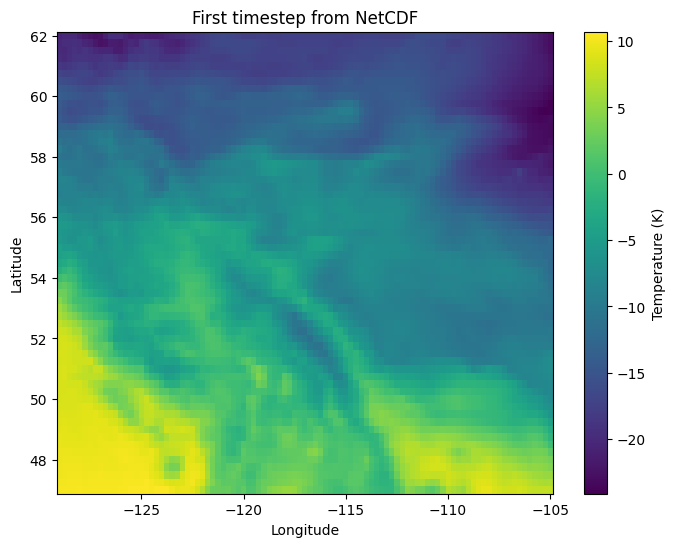

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.pcolormesh(lons, lats, arr[0,:,:] - 273.15, cmap="viridis")  # arr[0,:,:] = first timestep
plt.colorbar(label="Temperature (K)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("First timestep from NetCDF")
plt.show()
